# COMP47590: Advanced Machine Learning
# Assignment 1: Multi-label Classification

## Import Packages Etc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# import other useful packages
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import NearMiss
from sklearn.metrics import hamming_loss
from sklearn.metrics import f1_score
from sklearn.base import clone
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics


Using TensorFlow backend.


## Task 0: Load the Yeast Dataset

In [2]:
# Write your code here
dataset = pd.read_csv('Yeast.csv')
X = dataset[dataset.columns[:103]]
Y = dataset.loc[:,"Class1":] 



## Task 1: Implement the Binary Relevance Algorithm

In [3]:
# Write your code here
# Create a new classifier which is based on the sckit-learn BaseEstimator and ClassifierMixin classes
class BinaryRelevanceClassifier(BaseEstimator, ClassifierMixin):
    """A Binary Relevance classifier- The simplest approach to multi-label classification.
    - Training: For each class label implement individual binary base classifiers. This uses a one-vs-all approach to 
                generate the training sets for each base classifier.
    - Prediction: When a new prediction needs to be made compare the descriptive feature values of the new query instance to each label and return the target feature that belongs to the classes.
   
   Attributes
    ----------
    classes_ : array of shape = [n_classes] 
        The classes labels (single output problem).   
      
    Notes
    -----
    

    See also
    --------
    
    ----------
    
    Examples
    --------
    >>> from sklearn.datasets import load_iris
    >>> from sklearn.model_selection import cross_val_score
    >>> clf = BinaryRelevanceClassifier()
    >>> iris = load_iris()
    >>> cross_val_score(clf, iris.data, iris.target, cv=10)

    """
    
    # Constructor for the classifier object
    def __init__(self, classifier=None):
        self.classifier=classifier
        
    
    # The fit function to train a classifier
    def fit(self, X, y):
        """Fits classifier to training data
 
        Sets `self.partition_` (list of single item lists) and `self.model_count_` (equal to number of labels).


        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix
        y : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix of `{0, 1}`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments

        Returns
        -------
        self
            fitted instance of self

        Notes
        -----
        .. note :: Input matrices are converted to sparse format internally if a numpy representation is passed
        """
    
        self.model_count_ = y.shape[1]
        self.label_count = y.shape[1]
        self.clf = list()
        
     
        for i in range(self.model_count_):
            model_ =clone(self.classifier)
            my_model = model_.fit(X, y.iloc[:,i])
            self.clf.append(my_model)  
            
        
        return self
    
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        """Predict labels for X

        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix

        Returns
        -------
        :mod:`scipy.sparse` matrix of `{0, 1}`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments
        """
        
        
          # Initialise an empty list to store the predictions made
        self.pred_multiclass = list()
        
         # Iterate through the query instances in the query dataset 
        for model in self.clf:
            self.pred_multiclass.append(model.predict(X))
     
        return np.transpose(np.array(self.pred_multiclass))

    # The predict function to make a set of predictions for a set of query instances
    def predict_proba(self, X):
        """Predict probabilities of label assignments for X

        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix

        Returns
        -------
        :mod:`scipy.sparse` matrix of `float in [0.0, 1.0]`, shape=(n_samples, n_labels)
            matrix with label assignment probabilities
        """

        result = []
        for classifier in self.clf:
            # the multilabel classifier should provide a (n_samples, n_labels) matrix
            result.append(classifier.predict_proba(X)[:,0])
               
        return np.array(result).transpose()



## Task 2: Implement the Binary Relevance Algorithm with Under-Sampling

In [4]:
# Write your code here
# Create a new classifier which is based on the sckit-learn BaseEstimator and ClassifierMixin classes
class BinaryRelevanceClassifier(BaseEstimator, ClassifierMixin):
    """A Binary Relevance classifier- The simplest approach to multi-label classification using undersampling technique.
    - Training: For each class label implement individual binary base classifiers. This uses a one-vs-all approach to 
                generate the training sets for each base classifier.
    - Prediction: When a new prediction needs to be made compare the descriptive feature values of the new query instance to each label and return the target feature that belongs to the classes.
    
    Parameters
    ----------
   Undersampling string
        The Undersampling that can be used, for NearMiss undersampling

    Attributes
    ----------
    classes_ : array of shape = [n_classes] 
        The classes labels (single output problem).
    Undersampling: string
        The undersampling used    
       
    Notes
    -----
    

    See also
    --------
    
    ----------
    
    Examples
    --------
    >>> from sklearn.datasets import load_iris
    >>> from sklearn.model_selection import cross_val_score
    >>> clf = BinaryRelevanceClassifier()
    >>> iris = load_iris()
    >>> cross_val_score(clf, iris.data, iris.target, cv=10)

    """
    
    # Constructor for the classifier object
    def __init__(self, classifier=None,Undersampling=None):
        self.classifier=classifier
        self.Undersampling=Undersampling
        
    
    # The fit function to train a classifier
    def fit(self, X, y):
        """Fits classifier to training data
 
        Sets `self.partition_` (list of single item lists) and `self.model_count_` (equal to number of labels).


        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix
        y : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix of `{0, 1}`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments

        Returns
        -------
        self
            fitted instance of self

        Notes
        -----
        .. note :: Input matrices are converted to sparse format internally if a numpy representation is passed
        """
    
        self.model_count_ = y.shape[1]
        self.label_count = y.shape[1]
        self.clf = list()
        
        if self.Undersampling == 'undersampling':   
            for i in range(self.model_count_):
                undersample = NearMiss(version=1, n_neighbors=3) #Majority class examples with minimum average distance to three closest minority class examples.
                # transform the dataset
                X_resample, y_resample = undersample.fit_resample(X, y.iloc[:,i])
                model_ =clone(self.classifier)
                my_model = model_.fit(X_resample, y_resample)
                self.clf.append(my_model) 
        
        else:
            
            for i in range(self.model_count_):
                model_ =clone(self.classifier)
                my_model = model_.fit(X, y.iloc[:,i])
                self.clf.append(my_model)  
            
        
        return self
    
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        """Predict labels for X

        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix

        Returns
        -------
        :mod:`scipy.sparse` matrix of `{0, 1}`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments
        """
        
     
        # Initialise an empty list to store the predictions made
        self.pred_multiclass = list()
        
         # Iterate through the query instances in the query dataset 
        for model in self.clf:
            self.pred_multiclass.append(model.predict(X))
     
        return np.transpose(np.array(self.pred_multiclass))

    # The predict function to make a set of predictions for a set of query instances
    def predict_proba(self, X):
        """Predict probabilities of label assignments for X

        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix

        Returns
        -------
        :mod:`scipy.sparse` matrix of `float in [0.0, 1.0]`, shape=(n_samples, n_labels)
            matrix with label assignment probabilities
        """

 
        result = []
        for classifier in self.clf:
            # the multilabel classifier should provide a (n_samples, n_labels) matrix
            result.append(classifier.predict_proba(X)[:,0])
               
        return np.array(result).transpose()


In [5]:
# Split the data into a training set, a vaidation set, and a test set
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=123,\
                                    train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, random_state=123, \
                                        train_size = 0.5/0.7)

# Implementing model with Binary Relevance algorithm without undersampling
my_model = BinaryRelevanceClassifier(LogisticRegression())
my_model.fit(X_train,y_train)

y_pred = my_model.predict(X_train)
y_prob = my_model.predict_proba(X_train)


/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

## Task 3: Compare the Performance of Different Binary Relevance Approaches

Cross Validation Experiment scores With Our Model 0.34034076469798635
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.2s


Best parameters set found on development set:
{'classifier': GaussianNB(priors=None, var_smoothing=1e-09)}
0.44795464935745294
f1 score: training data -> 0.6552410437859353
f1 score: validation data -> 0.618556701030928
f1 score: test data -> 0.6271649954421148


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   24.4s finished


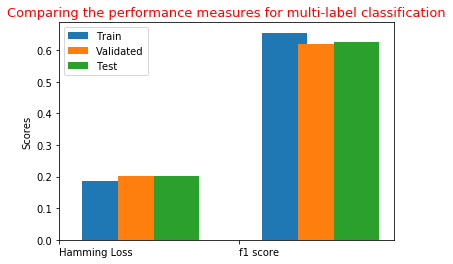

In [6]:

## Do a Cross Validation Experiment With Our Model
scores = cross_val_score(my_model, X_train, y_train, cv=10,n_jobs=-1,scoring='f1_macro')
print('Cross Validation Experiment scores With Our Model', scores.mean())


# Set up the parameter grid to seaerch
param = {'classifier': [LogisticRegression(max_iter=100,penalty='l2',random_state=0),
                        DecisionTreeClassifier(random_state=0),
                        GaussianNB(),
                        KNeighborsClassifier()
                        ] }

# Perform the search
my_tuned_model = GridSearchCV(BinaryRelevanceClassifier(), param_grid = param, cv=10, verbose = 2, n_jobs=-1, scoring='f1_macro')
my_tuned_model.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model.best_params_)
print(my_tuned_model.best_score_)


#"******** Training Data ********")
# Make a set of predictions for the training data
y_pred = my_model.predict(X_train)
#Performance testing
accuracy = hamming_loss(y_train, y_pred) # , normalize=True, sample_weight=None
HammingLoss1 = accuracy
accuracy = f1_score(y_train, y_pred, average='micro')
f11 = accuracy
print('f1 score: training data ->',f11)
#"****** Validation Data ********")

# Make a set of predictions for the validation data
y_pred = my_model.predict(X_valid)
# Print performance details
accuracy = hamming_loss(y_valid, y_pred) # , normalize=True, sample_weight=None
HammingLoss2= accuracy
accuracy = f1_score(y_valid, y_pred, average='micro')
f12 = accuracy
print('f1 score: validation data ->',f12)

#"****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = my_model.predict(X_test)
# Print performance details
accuracy = hamming_loss(y_test, y_pred) # , normalize=True, sample_weight=None
HammingLoss3 = accuracy
accuracy = f1_score(y_test, y_pred, average='micro')
f13 = accuracy
print('f1 score: test data ->',f13)

#Plotting the graph for performance comparison
labels = ['Hamming Loss','f1 score']
Train_data =  [HammingLoss1,f11]          
Valid_data = [HammingLoss2,f12]
Test_data = [HammingLoss3,f13]

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x+0.25, Train_data, width=0.25, label='Train',align='center')
rects2 = ax.bar(x+0.45, Valid_data, width=0.25, label='Validated',align='center')
rects3 = ax.bar(x+0.65, Test_data, width=0.25, label='Test',align='center')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title("Comparing the performance measures for multi-label classification",color='r',fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(labels,ha='left', minor=False)
ax.legend()


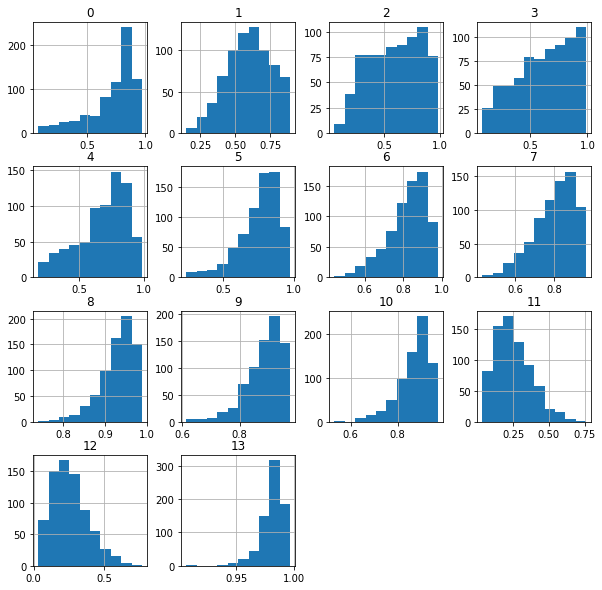

In [7]:
# Make a set of predictions for the test data
y_pred = my_model.predict_proba(X_test)
_ = pd.DataFrame(y_pred).hist(figsize = (10,10))

/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

Cross Validation Experiment scores With Our Model 0.4166194193572427
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   23.8s


Best parameters set found on development set:
{'classifier': GaussianNB(priors=None, var_smoothing=1e-09)}
0.44795464935745294
f1 score: training data -> 0.4571670309525488
f1 score: validation data -> 0.436745406824147
f1 score: test data -> 0.4327799859714754


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   26.4s finished


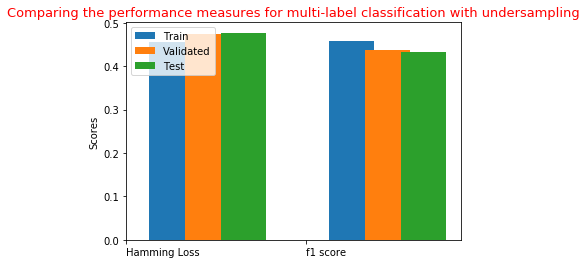

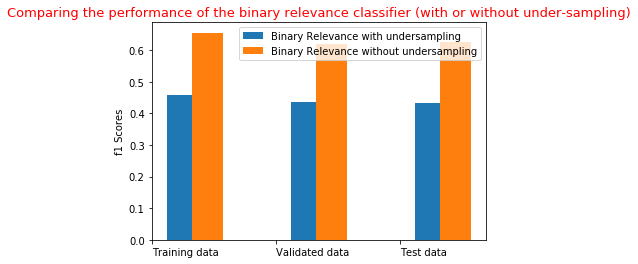

In [8]:
# Implementing model with Binary Relevance algorithm with undersampling
my_model = BinaryRelevanceClassifier(LogisticRegression(),'undersampling')
my_model.fit(X_train,y_train)

y_pred = my_model.predict(X_train)
y_prob = my_model.predict_proba(X_train)


## Do a Cross Validation Experiment With Our Model
scores = cross_val_score(my_model, X_train_plus_valid, y_train_plus_valid, cv=10,n_jobs=-1,scoring='f1_macro')
print('Cross Validation Experiment scores With Our Model', scores.mean())


# Set up the parameter grid to seaerch
param = {'classifier': [LogisticRegression(max_iter=100,random_state=0),
                        DecisionTreeClassifier(random_state=0),
                        GaussianNB(),
                        KNeighborsClassifier()
                        ] }

# Perform the search
my_tuned_model = GridSearchCV(BinaryRelevanceClassifier('undersampling'), param_grid = param, cv=10, verbose = 2, n_jobs=-1, scoring='f1_macro')
my_tuned_model.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model.best_params_)
print(my_tuned_model.best_score_)


#"******** Training Data ********")
# Make a set of predictions for the training data
y_pred = my_model.predict(X_train)
#Performance testing
accuracy = hamming_loss(y_train, y_pred) # , normalize=True, sample_weight=None
HammingLoss1 = accuracy
accuracy = f1_score(y_train, y_pred, average='micro')
f1score1 = accuracy
print('f1 score: training data ->',f1score1)

#"****** Validation Data ********")

# Make a set of predictions for the validation data
y_pred = my_model.predict(X_valid)
# Print performance details
accuracy = hamming_loss(y_valid, y_pred) # , normalize=True, sample_weight=None
HammingLoss2= accuracy
accuracy = f1_score(y_valid, y_pred, average='micro')
f1score2 = accuracy
print('f1 score: validation data ->',f1score2)

#"****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = my_model.predict(X_test)
# Print performance details
accuracy = hamming_loss(y_test, y_pred) # , normalize=True, sample_weight=None
HammingLoss3 = accuracy
accuracy = f1_score(y_test, y_pred, average='micro')
f1score3 = accuracy
print('f1 score: test data ->',f1score3)


#Plotting the graph for performance comparison
labels = ['Hamming Loss','f1 score']
Train_data =  [HammingLoss1,f1score1]          
Valid_data = [HammingLoss2,f1score2]
Test_data = [HammingLoss3,f1score3]

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x+0.25, Train_data, width=0.25, label='Train',align='center')
rects2 = ax.bar(x+0.45, Valid_data, width=0.25, label='Validated',align='center')
rects3 = ax.bar(x+0.65, Test_data, width=0.25, label='Test',align='center')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title("Comparing the performance measures for multi-label classification with undersampling",color='r',fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(labels,ha='left', minor=False)
ax.legend()

# Comparing the performance of the binary relevance classifier (with or without under-sampling)
#Plotting the graph 
labels = ['Training data','Validated data','Test data']
undersample_data =  [f1score1,f1score2,f1score3]          
sample_data = [f11,f12,f13]


x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x+0.25, undersample_data, width=0.25, label='Binary Relevance with undersampling',align='center')
rects2 = ax.bar(x+0.45, sample_data, width=0.25, label='Binary Relevance without undersampling',align='center')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('f1 Scores')
ax.set_title("Comparing the performance of the binary relevance classifier (with or without under-sampling)",color='r',fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(labels,ha='left', minor=False)
ax.legend()

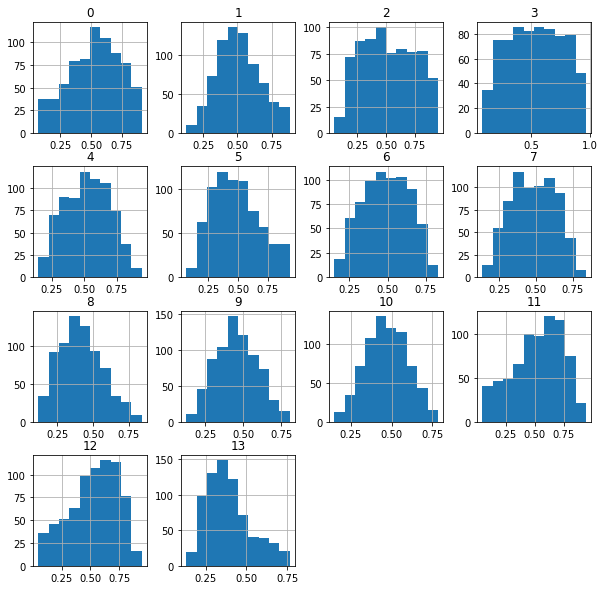

In [9]:
# Make a set of predictions for the test data
y_pred = my_model.predict_proba(X_test)
_ = pd.DataFrame(y_pred).hist(figsize = (10,10))

## Task 4: Implement the Classifier Chains Algorithm

In [10]:
# Write your code here
# Create a new classifier which is based on the sckit-learn BaseEstimator and ClassifierMixin classes
class ChainClassifier(BaseEstimator, ClassifierMixin):
    """A ChainClassifier- generates a chain of binary classifiers each of predicts the presence or absence of a specific label.
    - Training: Implement a chain of binary classifier which includes the original descriptive features plus the outputs of the classifiers so far in the chain. 
                This allows label associations to be taken into account.
    - Prediction: Each model makes a prediction in the order specified by the chain using
                  all of the available features provided to the model plus the predictions
                  of models that are earlier in the chain.
 

    Attributes
    ----------
    classes_ : array of shape = [n_classes] 
        The classes labels (single output problem).
     
    Notes
    -----
    

    See also
    --------
    
    ----------
    
    Examples
    --------
    >>> from sklearn.datasets import load_iris
    >>> from sklearn.model_selection import cross_val_score
    >>> clf = ChainClassifier()
    >>> iris = load_iris()
    >>> cross_val_score(clf, iris.data, iris.target, cv=10)

    """
    
    
    # Constructor for the classifier object
    def __init__(self, classifier=None):
        self.classifier=classifier
        
    
    # The fit function to train a classifier
    def fit(self, X, y):
        """Fits classifier to training data
 
        Sets `self.partition_` (list of single item lists) and `self.model_count_` (equal to number of labels).


        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix
        y : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix of `{0, 1}`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments

        Returns
        -------
        self
            fitted instance of self

        Notes
        -----
        .. note :: Input matrices are converted to sparse format internally if a numpy representation is passed
        """
    
        self.model_count_ = y.shape[1]
        self.label_count = y.shape[1]
        self.clf = list()
        self.cols = y.columns
    
        for i in range(self.model_count_):
            model_ = clone(self.classifier)
            my_model = model_.fit(X, y.iloc[:,i])
            self.clf.append(my_model)
            X = pd.concat([X,y.iloc[:,i]], axis=1)
        
        return self
    
    
    # The predict function to make a set of predictions for a set of query instances
    def predict(self, X):
        """Predict labels for X

        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix

        Returns
        -------
        :mod:`scipy.sparse` matrix of `{0, 1}`, shape=(n_samples, n_labels)
            binary indicator matrix with label assignments
        """
        
        # Check is fit had been called by confirming that the teamplates_ list has been set up
        #check_is_fitted(self, ['clf'])

        # Check that the input features match the type and shape of the training features
       # X = check_array(X)
        
          # Initialise an empty list to store the predictions made
        self.pred_multiclass = list()
        
         # Iterate through the query instances in the query dataset 
    
        X_temp = pd.DataFrame.copy(X)
        i = 0
        self.pred = []
        for model in self.clf:
            y_temp = model.predict(X_temp)
            X_temp[self.cols[i]] = y_temp
            self.pred.append(y_temp)
            i +=1

        
        return np.transpose(np.array(self.pred))

    
    # The predict function to make a set of predictions for a set of query instances
    def predict_proba(self, X):
        """Predict probabilities of label assignments for X

        Parameters
        ----------
        X : `array_like`, :class:`numpy.matrix` or :mod:`scipy.sparse` matrix, shape=(n_samples, n_features)
            input feature matrix

        Returns
        -------
        :mod:`scipy.sparse` matrix of `float in [0.0, 1.0]`, shape=(n_samples, n_labels)
            matrix with label assignment probabilities
        """

        self.result = []
        X_label = pd.DataFrame.copy(X)
        i= 0
        for classifier in self.clf:
            # the multilabel classifier should provide a (n_samples, n_labels) matrix
            label = classifier.predict_proba(X_label)[:,0]
            X_label[self.cols[i]] = label
            X_label[self.cols[i]].apply(lambda x : 1 if (x < 0.5) else 0)
            self.result.append(label)   
            i +=1
        return np.transpose(np.array(self.result))



## Task 5: Evaluate the Performance of the Classifier Chains Algorithm

/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/akanshakhare/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

Cross Validation Experiment scores With Our Model 0.3858752973081318
Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   21.8s finished


Best parameters set found on development set:
{'classifier': GaussianNB(priors=None, var_smoothing=1e-09)}
0.4470132292190869
f1 score: validation data -> 0.6508712282192946
f1 score: validation data -> 0.6321930522407848
f1 score: validation data -> 0.6101634045609626


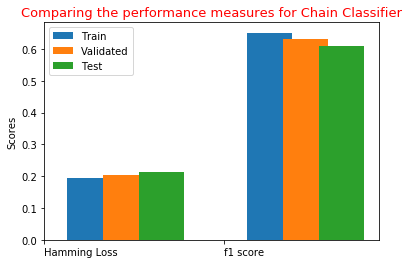

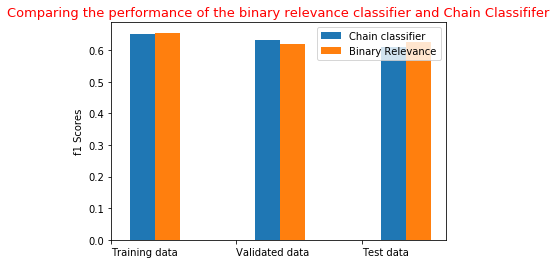

In [11]:
# Write your code here

# Split the data into a training set, a vaidation set, and a test set
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, random_state=0, \
                                        train_size = 0.5/0.7)

my_model = ChainClassifier(LogisticRegression(random_state=0))
my_model.fit(X_train,y_train)
y_pred = my_model.predict(X_train)
y_prob = my_model.predict_proba(X_train)

## Do a Cross Validation Experiment With Our Model
scores = cross_val_score(my_model, X_train_plus_valid, y_train_plus_valid, cv=10,n_jobs=-1,scoring='f1_macro')
print('Cross Validation Experiment scores With Our Model', scores.mean())


# Set up the parameter grid to seaerch
param = {'classifier': [LogisticRegression(max_iter=100,penalty='l2',random_state=0),
                        DecisionTreeClassifier(random_state=0),
                        GaussianNB(),
                        KNeighborsClassifier()
                        ]}

# Perform the search
my_tuned_model = GridSearchCV(ChainClassifier(), param_grid = param, cv=10, verbose = 2, n_jobs=-1, scoring='f1_macro')
my_tuned_model.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
print(my_tuned_model.best_params_)
print(my_tuned_model.best_score_)


#"******** Training Data ********")
# Make a set of predictions for the training data
y_pred = my_model.predict(X_train)
#Performance testing
accuracy = hamming_loss(y_train, y_pred) # , normalize=True, sample_weight=None
HammingLoss1 = accuracy
accuracy = f1_score(y_train, y_pred, average='micro')
f1score1 = accuracy
print('f1 score: validation data ->',f1score1)
#"****** Validation Data ********")

# Make a set of predictions for the validation data
y_pred = my_model.predict(X_valid)
# Print performance details
accuracy = hamming_loss(y_valid, y_pred) # , normalize=True, sample_weight=None
HammingLoss2= accuracy
accuracy = f1_score(y_valid, y_pred, average='micro')
f1score2 = accuracy
print('f1 score: validation data ->',f1score2)

#"****** Test Data ********")

# Make a set of predictions for the validation data
y_pred = my_model.predict(X_test)
# Print performance details
accuracy = hamming_loss(y_test, y_pred) # , normalize=True, sample_weight=None
HammingLoss3 = accuracy
accuracy = f1_score(y_test, y_pred, average='micro')
f1score3 = accuracy
print('f1 score: validation data ->',f1score3)

#Plotting the graph for performance comparison
labels = ['Hamming Loss','f1 score']
Train_data =  [HammingLoss1,f1score1]          
Valid_data = [HammingLoss2,f1score2]
Test_data = [HammingLoss3,f1score3]

x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x+0.25, Train_data, width=0.25, label='Train',align='center')
rects2 = ax.bar(x+0.45, Valid_data, width=0.25, label='Validated',align='center')
rects3 = ax.bar(x+0.65, Test_data, width=0.25, label='Test',align='center')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title("Comparing the performance measures for Chain Classifier",color='r',fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(labels,ha='left', minor=False)
ax.legend()

# Comparing the performance of the binary relevance classifier and Chain Classififer

#Plotting the graph 
labels = ['Training data','Validated data','Test data']
data1 =  [f1score1,f1score2,f1score3]          
data2 = [f11,f12,f13]


x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots()
rects1 = ax.bar(x+0.25, data1, width=0.20, label='Chain classifier')
rects2 = ax.bar(x+0.45, data2, width=0.20, label='Binary Relevance')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('f1 Scores')
ax.set_title("Comparing the performance of the binary relevance classifier and Chain Classififer",color='r',fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(labels,ha='left', minor=False)
ax.legend()

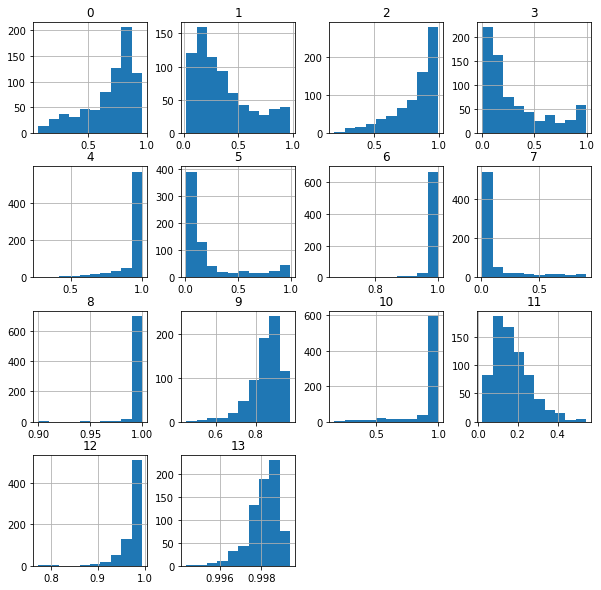

In [12]:
# Make a set of predictions for the test data
y_pred = my_model.predict_proba(X_test)
_ = pd.DataFrame(y_pred).hist(figsize = (10,10))

## Task 6: Reflect on the Performance of the Different Models Evaluated

*Write your reflection here (max 300 words)*

- Ensemble learning helps to improve machine learning results by combining several models like decision trees, logistic regression, KNN, Naive bayes or support vector machine.

In binary relevance classifier, binary relevance algorithm is used to implement ensemble method. It train the model on each label of the target dataset. 
- When we calculate f1 score of the trained model without undersampling on training data, it is not giving more than 70% accuracy which means Yeast dataset is not having imbalanced class distribution.
- When we compare the performance of binary relevance classifier on train data, validated data and test data with the another binary relevance classifier using undersampling, we found that the performance(f1 score) is decreasing. This is because model with undersampling is using NearMiss-1 undersampling technique which means it select the majority class samples whose average distances to three closest minority class samples are the smallest. This approach decrease the number of samples because it will use suitable data to train the model. 
- Predict_proba function represent the probability of the class labels which has '0' target value. 
- Used GridSearch with 10Fold Cross validation to train and test the estimators(LogisticRegression, DecisionTreeClassifier, GaussianNB, KNeighborsClassifier) and We have got GaussianNB as the best estimator.

In chain classifier, classifier chains algorithm is used to implement ensemble method by taking advantage of label association. 
- When we compare the performance of binary relevance classifier on train data, validated data and test data with the chain classifier, we found that the performance(f1 score) is almost similar.
- Predict_proba function represent the probability of the class labels which has '0' target value. 
- Used GridSearch with 10Fold Cross validation to train and test the estimators(LogisticRegression, DecisionTreeClassifier, GaussianNB, KNeighborsClassifier) and We have got GaussianNB as the best estimator.

### Conclusion

Binary relevance classifier is simple, efficient and does not have label correlation. Whereas, Chain classifier is flexible, efficient and have label correlation. Chain classifier solve the label independence problem of Binary relevance classifier. Yeast dataset is not imbalanced class dataset thats why binary relevance classifier and chain classifier both are giving the similar accuracy(f1 score). And binary relevance classifier with undersampling is giving low f1 score compare to chain classifier and binary relevance classifier. Cross validation score of chain classifier is higher than binary relevance classifier score so we can say that predictive performance of the chain classifier is better than the predictive performance of binary relevance classifier.